In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

x,y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,stratify=y,random_state=42)


In [30]:
X_train.shape

(67000, 2)

In [31]:
y_train.shape

(67000,)

In [32]:
X_test.shape

(33000, 2)

In [33]:
y_test.shape

(33000,)

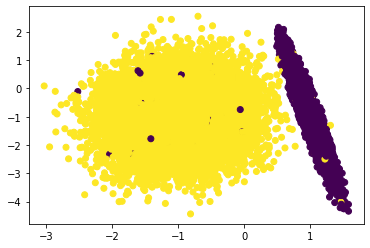

In [34]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.show()

In [61]:
## custom implementation of RandomSearchCV :

def RandomSearchCV(x_train,y_train, classifier, param, folds):
    train_scores = []
    test_scores = []

    
    x_train_split = []
    y_train_split = []
    for i in range(0, len(x_train), int(len(x_train)/folds)):
        x_train_split.append(x_train[i:i+int(len(x_train)/folds)])
        y_train_split.append(y_train[i:i+int(len(y_train)/folds)])

  

    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []

        for group in range(len(x_train_split)):
            x_train_group = np.concatenate(x_train_split[0:group] + x_train_split[group+1:])
            x_cv_group = x_train_split[group]
            y_train_group = np.concatenate(y_train_split[0:group] + y_train_split[group+1:])
            y_cv_group = y_train_split[group]

            
            classifier.n_neighbors = k
            classifier.fit(x_train_group, y_train_group)

      
            y_pred = classifier.predict(x_cv_group)
            testscores_folds.append(accuracy_score(y_cv_group, y_pred))

            y_pred = classifier.predict(x_train_group)
            trainscores_folds.append(accuracy_score(y_train_group, y_pred))

        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))

    return train_scores, test_scores


In [72]:
classifier = KNeighborsClassifier()
param = {'n_neighbors':sorted(tuple(random.sample(range(1,50),10)))}
folds = 3

train_score,test_scores = RandomSearchCV(X_train,y_train,classifier,param,folds)

print('')
print(param)

100%|██████████| 10/10 [01:28<00:00,  8.87s/it]


{'n_neighbors': [2, 4, 10, 11, 15, 19, 21, 22, 27, 29]}


In [74]:
print('train_score:',train_score)
print('')
print('test_scores:',test_scores)

train_score: [1.0, 0.9948470247266099, 0.9948078456638969, 0.9947294877890858, 0.9946959059501441, 0.9946343387441892, 0.9945802340855718, 0.9945671745650772, 0.9945261299281833, 0.9945242643540027]

test_scores: [0.9928804907535933, 0.9961156136658756, 0.9960820310750906, 0.9959924774996641, 0.9959700891058075, 0.9959477007119509, 0.995914118121166, 0.9958917297273094, 0.9958693413334527, 0.9958693413334527]


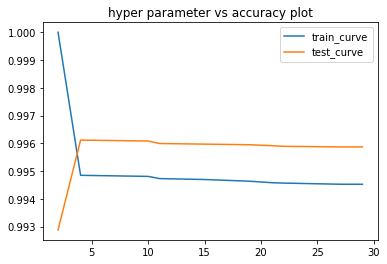

In [76]:
plt.plot(param['n_neighbors'],train_score,label='train_curve')
plt.plot(param['n_neighbors'],test_scores,label='test_curve')
plt.title('hyper parameter vs accuracy plot')
plt.legend()
plt.show()

## observation:
# here we will consider k value 4 because we consider k at that point where gap between train_curve and train_cv_curve is minimum and higher the accuracy

In [77]:
import matplotlib
def plot_decision_boundary(a,b,c,d):
  c_1=matplotlib.colors.ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
  c_2=matplotlib.colors.ListedColormap(['#FF0000','#00FF00','#0000FF'])

  x_min, x_max = a.min()-1, a.max()+1
  y_min, y_max = b.min()-1, b.max()+1

  xx, yy = np.meshgrid(np.arange(x_min,x_max,0.02), np.arange(y_min,y_max,0.02))

  z = d.predict(np.c_[xx.ravel(),yy.ravel()])
  z_1 = z.reshape(xx.shape)

  plt.figure()
  plt.pcolormesh(xx,yy,z_1,cmap=c_1)
  plt.scatter(a,b,c=b,cmap=c_2)

  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

  plt.title("2_class classification(k = %i)" % (d.n_neighbors))
  plt.show()


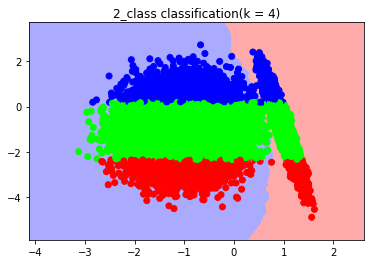

In [79]:
classifier=KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train,y_train)
plot_decision_boundary(X_train[:,0],X_train[:,1],y_train,classifier)